# Capítulo 4: Marco Teórico – Herramientas computacionales

En esta _notebook_ se encuentran algunos de los procesos descritos en el 
**Capítulo 4: Marco teórico. Sección 3**

## Python

Python es un lenguaje de programación de propósito general creado alrededor del año 1990 por Guido Van Rossum en el CWI 
(Centrum Wiskunde & Informatica), Países Bajos (Nosrati, 2011).

Es flexible, dinámico y de alto nivel. Su popularidad radica principalmente en su sintaxis de alto nivel a comparación de otros lenguajes como 
C o C# ya que Python es explícito y claro, al grado se ser muy similar al lenguaje natural del ser humano (en inglés) (Hill, 2020), por ejemplo, 
para “imprimir” o mostrar la oración ‘Hola mundo’ en la consola basta con escribir el comando `print(‘Hola mundo’)`. Algunas de las ventajas son las 
siguientes:

* Es un lenguaje de programación de código abierto u _open source_, como se le conoce a nivel mundial. Es gratis, se puede distribuir y contribuir 
al desarrollo de este, libremente (Nosrati, 2011). Así como que la ejecución puede ser a través de diferentes plataformas 
y sistemas (Windows, Mac OS y Linux)(Ceder, 2010).

* Tiene un amplio catálogo de paquetes de funciones y operaciones, también conocidos como librerías y módulos de Python, que permiten a los usuarios 
realizar diferentes tareas de algún área específica como: desarrollo web, creación de aplicaciones, cómputo científico, Inteligencia Artificial, 
entre otros (Ceder, 2010).

### Librerías de Visualización

Parte de la exploraciónn de los datos y la extracciónn de informaciónn relevante, es poder visualizar esta información para la comunicación de los 
hallazgos de manera directa y de fácil entendimiento. Estas tareas estan a cargo de las siguientes librerías:

> Como ejemplo de graficación entre Matplotlib y Seaborn, se harán las mismas gráficas. Se graficará:
> 
> * en el eje _x_ `'total_bill'`
> * en el eje _y_ `'tip'`
> * serán dos gráficas, separados por los valores categóricos de `'time'`
> * con marcadores diferentes dependiendo de la variable `'sex'`

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# Cargar datos
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### Matplotlib

Es de las principales herramientas de visualizaciónn de datos así como la base en muchas otras visualizaciones, por ejemplo, se encuentra integrada 
en Pandas y es la base en la que se construye Seaborn (Hunter, 2007).

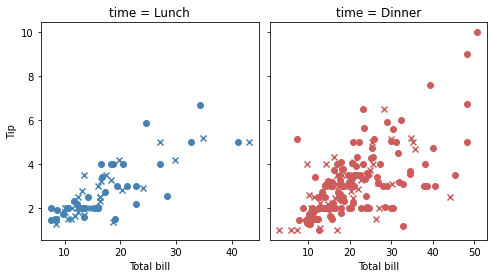

In [2]:
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2, sharey=True, figsize = (8,4),
#dpi=150
)
fig.subplots_adjust(wspace=0.05)

# Mascara de time
mask_1 = df['time'] == 'Lunch'
mask_2 = df['time'] == 'Dinner'

# Mascara de sex
mask_male = df['sex'] == 'Male'
mask_female = df['sex'] == 'Female'

ax1.set_title('time = Lunch')
ax1.scatter(x= df[mask_1 & mask_male]['total_bill'], y= df[mask_1 & mask_male]['tip'], marker= 'o', color = 'steelblue')
ax1.scatter(x= df[mask_1 & mask_female]['total_bill'], y= df[mask_1 & mask_female]['tip'], marker= 'x', color = 'steelblue')

ax2.set_title('time = Dinner')
ax2.scatter(x= df[mask_2 & mask_male]['total_bill'], y= df[mask_2 & mask_male]['tip'], marker= 'o', color = 'indianred')
ax2.scatter(x= df[mask_2 & mask_female]['total_bill'], y= df[mask_2 & mask_female]['tip'], marker= 'x', color = 'indianred')

ax1.set_ylabel('Tip')
ax1.set_xlabel('Total bill')
ax2.set_xlabel('Total bill')

plt.show()

#### Seaborn

Se enfoca principalmente en gráficos estadísticos con una mejor estilización a comparación de Matplotlib. La integración con Pandas es mucho mejor al 
darle un conjunto de datos en forma de `pandas.DataFrame` puede “mapearlo” y al asignar las variables a visualizar, solo hace falta declarar el nombre 
de la columna en algún parámetro de visualización, dando como resultados visualizaciones claras con menos lineas de código. (Waskom, 2021).


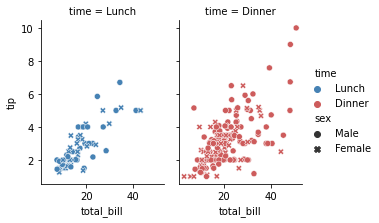

In [3]:
p = sns.relplot(data= df, x= 'total_bill', y= 'tip',
            col= 'time', hue= 'time', style= 'sex',
            palette = ['steelblue','indianred'], 
            height=3, aspect=0.7
            )
#p.savefig('figures/plot_seaborn.png', dpi=200)

#### Folium

Esta librería facilita la visualización de los datos geo-espaciales ya manipulados previamente (sea con Pandas o GeoPandas) para su representación a 
través de mapas interactivos. Se encuentra construido sobre la librería `leaflet.js` de JavaScript (python visualization, 2021).

In [4]:
# Cargar datos desde sklearn
from sklearn.datasets import fetch_california_housing

In [5]:
# Se extraen longitudes y latitudes de housing.csv
loc = fetch_california_housing()['data'][:,-2:]

# Se importa Folium
import folium
# Se importa un mapa de calor
from folium.plugins import HeatMap

# Crear mapa base
mapa = folium.Map(location=[38,-121], zoom_start=7)

# Crear HeatMap y agregarlo al mapa base
HeatMap( data= loc,
        name = 'Heat map - Ejemplo',
        radius = 7,
        min_opacity = 0.5,
        blur = 8
).add_to(mapa)

# Guardar mapa en la carpeta de figuras
#mapa.save('figures/heatmap_folium_ch04.html')
mapa